# Cloning the repository

The first thing for you to do is to clone the repository associated with this class.
The repository is a private repository - you will get an invitation to join.

in a terminal do:

git clone https://github.com/alexieleauthaud/ASTR214_2017.git

You yourself will never add things to this repo (you should not "push").
However, I will add things to this repository as we go along.
To update the repository do:

git pull

This repository has a directory called

/code

where useful data is stored and another called

/data

where you can put data

# Getting your python set up

### Practical info on python and required packages.

Throughout this class, we will be using python within IPython notebook environment.

Prior to this class, you will need to get python, and jypter notebooks working on your laptop and to install the necessary packages for this class.

You can find some information about getting set up here:

<a href="https://github.com/alexieleauthaud/RedWoodTools/wiki/NoteBooks">Notebook set up</a>

<a href="https://github.com/alexieleauthaud/RedWoodTools/wiki/Python">Python set up</a>

The rationale for using Notebooks can be found <a href="http://pgbovine.net/ipython-notebook-first-impressions.htm">here</a> - it simplifies the work flow and closely connects plots with the code that produces them. 

For this class, in addition to the standard libraries (matplotlib, numpy, scipy, that should already be installed by Anaconda) you will need to install the following packages: 

### Required python packages

<tt>pyfits</tt> - a package for reading FITS files. 
A FITS file with SDSS data is available in this repository. 

<a href="https://bitbucket.org/bdiemer/colossus/overview"><tt>colossus</tt></a> - Benedikt Diemer's  python package containing useful routines for computing various cosmological quantities (distances, variances, power spectra, halo profiles, etc.) that we will be using throughout this course)

<tt><a href="http://scikit-learn.org/stable/">scikit-learn</a></tt> - python package containing various useful machine learning routines, which we will be using from time to time. The routines are also used by the AstroML package.

<tt><a href="https://pypi.python.org/pypi/astroML/">AstroML</a></tt> - this library was developed to support the book <a href="http://press.princeton.edu/titles/10159.html">''Statistics, Data Mining, and Machine Learning in Astronomy''</a> by Ivezic et al. The book itself is not needed for this course.

### Preliminaries: set up plotting parameters

In [7]:
# First try and see if you directory is set up correctly
# Place yourself in the directory where this notebook is located
# And run this notebook up to this cell.
# You should get no error messages

from code.read_sdss_fits import read_sdss_fits
from code.setup import data_home_dir

In [8]:
# You can add this to the top of notebooks in order to make pretty inline figures
# Make sure to run these notebooks from the current directory so that you can acess the code under /code.
# Try running this cell to see if you have everything set up correctly so far

%matplotlib inline
import matplotlib.pyplot as plt

from code.plot_utils import plot_pretty
plot_pretty()

ModuleNotFoundError: No module named 'setup'

### SDSS DR8 galaxy sample

For some exercises we will be using SDSS data.
Download <a href="https://www.dropbox.com/s/bu625ewvdv48jkl/SDSSspecgalsDR8full.fit.txt?dl=0">this SDSS file</a> (165 Mb).
Put this file under the /data directory.

This is a binary FITS file containing data from the SDSS survey and was produced by running an SQL query on the SDSS <a href="http://skyserver.sdss.org/CasJobs/">CasJobs server</a>.

The SDSS FITS file used is large because it includes a number of properties and because it selects almost all low-z galaxies from the SDSS (called the main galaxy sample, to differentiate from the quasar and LRG samples). 

The SQL script used to produce the FITS file below can be found <a href="http://astro.uchicago.edu/~andrey/classes/a304s17/data/query_SDSSspecgalsDR8full.fit.txt">here.</a> 

A description of various entries for SDSS galaxies in DR8 can be found <a href="http://skyserver.sdss.org/dr8/en/help/browser/browser.asp">here</a>. 

If you have not queried SDSS data base yet, I encourage you to use this example, to create CasJobs account and construct your own queries for particular properties (but this is not a necessary step for this class).

The code for reading SDSS fits file can be found in code/read_sdss_fits; uncomment the following line, if you want to see the code inline here in the notebook. 

In [3]:
# %load code/read_sdss_fits.py
import os
import numpy as np

def read_sdss_fits(data_file=None):
    """Loader for SDSS Galaxies w
    
    Returns
    -------
    data : recarray, shape = (327260,)
        record array containing pipeline parameters


    """
    # pyfits is an optional dependency: don't import globally
    import pyfits

    if not os.path.exists(data_file):
        print "***error! data file",data_file," does not exist!"
        return 0
    hdulist = pyfits.open(data_file)
    return np.asarray(hdulist[1].data)


routine <tt>data_home_dir()</tt> in <tt>code/setup/setup.py</tt> should return top directory for data files
Make sure you change this path to the directory where you store the data/ directory that you've downloaded. 

### Let's read the fits table with SDSS spectroscopic galaxy sample

In [7]:
from code.read_sdss_fits import read_sdss_fits
from code.setup import data_home_dir

# read fits file with the SDSS DR8 main spectroscopic sample
data = read_sdss_fits(data_home_dir()+'SDSSspecgalsDR8full.fit')


In [8]:
# let's see the names of the quantities available in the SDSS table
import pyfits

hdulist = pyfits.open(data_home_dir()+'SDSSspecgalsDR8full.fit')

print hdulist[1].columns.names

['ra', 'dec', 'mjd', 'plate', 'fiberID', 'class', 'z', 'zErr', 'rChi2', 'velDisp', 'velDispErr', 'extinction_r', 'extinction_g', 'petroMag_r', 'psfMag_r', 'psfMagErr_r', 'modelMag_u', 'modelMagErr_u', 'modelMag_g', 'modelMagErr_g', 'modelMag_r', 'modelMagErr_r', 'modelMag_i', 'modelMagErr_i', 'modelMag_z', 'modelMagErr_z', 'cmodelMag_u', 'cmodelMagErr_u', 'cmodelMag_g', 'cmodelMagErr_g', 'cmodelMag_r', 'cmodelMagErr_r', 'cmodelMag_i', 'cmodelMagErr_i', 'petroR50_r', 'petroR90_r', 'petroR50Err_r', 'petroR90Err_r', 'fracdeV_r', 'expRad_r', 'expRadErr_r', 'deVRad_r', 'deVRadErr_r', 'deVMag_r', 'deVMagErr_r', 'expMag_r', 'expMagErr_r', 'lnLDeV_r', 'lnLExp_r', 'deVAB_r', 'deVABErr_r', 'expAB_r', 'expABErr_r', 'h_alpha_flux', 'h_alpha_flux_err', 'oiii_5007_flux', 'oiii_5007_flux_err', 'd4000', 'd4000_err', 'bptclass', 'lgm_tot_p50', 'sfr_tot_p50', 'objID', 'specObjID']


To get info on different quantities in the list above, consult <a href="https://skyserver.sdss.org/dr12/en/help/browser/browser.aspx">SDSS DR8 Galaxy table schema browser.</a> We will first focus on magnitudes and sizes. 

### Magnitudes of galaxies

Astronomers use a logarithmic magnitude scale to quantify the apparent and intrinsic brightness of sources, which is akin to the historical visual magnitude system based on the roughly logarithmic sensitivity of our eyes.
$$m=-2.5\log_{10}f + \mathrm{const},$$<br>
where $f$ is flux from the source of luminosity $L$ at distance $d_{\rm L}$: $f=L/(4\pi d_{\rm L}^2).$

In practice flux is always observed within some limited range of wavelengths (band) in which device or filter is sensitive and magnitude and luminosity are measured within such band weighted by the instrumental response as a function of wavelength. The choice of filter and the choice to calibrate/normalize the constant in the above equation define the <b>magnitude system.</b> 

A number of different magnitude systems exist in the literature, especially in older papers. Modern magnitude systems, e.g. in SDSS, are based on the AB-magnitude system introduced by <a href="http://adsabs.harvard.edu/abs/1983ApJ...266..713O">Oke & Gunn (1983)</a>.


In the SDSS catalog magnitudes are defined using light from a limited range of wavelengths, defined by a filter. 
In the AB system this is given by (see <a href="http://adsabs.harvard.edu/abs/1996AJ....111.1748F">Fukugita et al. 1996</a>):
$$
m_f =-2.5\log_{10}\frac{\int f_{\nu}S(\nu) d(\log_{10}\nu)}{\int S({\nu}) d(\log_{10}\nu)} - 48.6,
$$
where $f_\nu$ is the specific flux per unit frequency.

The SDSS filter transmission curves, $S_\lambda$, can be found <a href="http://classic.sdss.org/dr7/instruments/imager/filters/">here</a>.  SDSS database reports spectra as the flux density per unit wavelength at a given $\lambda$, $f_\lambda$,  instead of $f_\nu$.  Converting from $f_\nu$ to $f_\lambda$  ($\nu=c/\lambda$, $d\nu=-cd\lambda/\lambda^2$, so $f_\nu=\lambda^2 f_\lambda/c$), the magnitude in a given 
filter can be expressed as:
$$
m_f =-2.5\log_{10}\left[\frac{10^{19.44}}{c}\frac{\int f_{\lambda}S(\lambda)\lambda d\lambda}{\int S({\lambda})\lambda^{-1} d\lambda}\right].
$$

### Applying the equations: magnitudes from spectrum

Now let's plot some galaxy images and spectra and examine properties of galaxies of different appearance. The script below uses routine plot_image_spec_sdss_galaxy in the eponymous file in code/ . Look in code/plot_image_spec_sdss_galaxy.py if you wish to examine how it works. The code takes info on an object in the SDSS and queries SDSS to get its image and spectrum. Thus, you should be connected to the internet to run it. 

<b>Defining the sample.</b> Now we apply some cuts to create well-defined magnitude limited sample and compute some useful quantities such as Vmax of galaxies - the maximum volume within which a galaxy of a given magnitude can be observed given the faint magnitude limit of the SDSS ($m_r=17.77$). 

To compute cosmological distances we will use Benedikt Diemer's <a href="https://bitbucket.org/bdiemer/colossus/overview">colossus python package</a> (we will also use other useful routines from colossus in other parts of this course)

In [67]:
import numpy as np

# lower limit on z is to avoid the nearest galaxies for which SDSS pipeline often does not perform well (splitting them into pieces, etc)
# with z_min=0.005 we are excluding galaxies closer than the Virgo cluster ~16 Mpc away from the Milky Way
# z_max=1.0 is to avoid misclassified objects that appear as very high z systems
z_min = 0.005; z_max = 1.0

# SDSS DR8 solid angle in steradians, the solid angle of the SDSS spectroscopic survey is 9274 square degrees, see:
# https://www.sdss3.org/dr8/scope.php
solid_angle = 9274.*(np.pi/180)**2

# magnitude cuts appropriate for the SDSS main spectroscopic sample 
m_min = 14.0; m_max = 17.77
# correct r-band Petrosian magnitudes for Galactic extinction before applying magnitude cuts
mr = data['petroMag_r'] - data['extinction_r']
gr = data['cmodelMag_g'] - data['cmodelMag_r']
# redshift cut and magnitude cuts
data = data[(data['z'] > z_min) & (data['z'] < z_max) & (mr > m_min) & (mr < m_max) & (gr>-2.5) & (gr<2.5)]

# first let's compute some things for the entire z- and magnitude limited sample
# g-r color in model mags
gr = data['cmodelMag_g'] - data['extinction_g'] - data['cmodelMag_r'] + data['extinction_g']
#gr = data['cmodelMag_g'] - data['cmodelMag_r'] 
mcmodel = data['cmodelMag_r']
r50 = data['petroR50_r']; z = data['z']; ext = data['extinction_r']
# extinction-corrected surface brightness using Petrosian magnitude and half-light radius
mpetro = data['petroMag_r'] - ext
sb = mpetro - 2.5*np.log10(0.5) + 2.5*np.log10(np.pi*(r50)**2)

print "selected %d galaxies"%np.shape(sb)
# now compute distances and maximum comoving volume out to which galaxy would be detectable
from colossus.cosmology import cosmology

# set cosmology to the best values from 9-year WMAP data
cosmo = cosmology.setCosmology('WMAP9')

# compute luminosity and angular diameter distances
d_L = cosmo.luminosityDistance(z)/cosmo.h
d_A = d_L/(1.+z)**2

# absolute magnitude in the r-band; apply +1.3*z correction for evolution (see Bernardi et al. 2010)
# and k-correction using polynomial approximations of Chilingarian et al. 2010
# see http://kcor.sai.msu.ru/getthecode/
from code.calc_kcor import calc_kcor 
# this k-correction is not designed for z>0.6, so limit the z for correction calculation
ihz = [z>0.6]; zk = np.copy(z); zk[ihz] = 0.6
kcorr = calc_kcor('r', zk, 'g - r', gr)

# absolute magnitude in the r-band, accounting for extinction, evolution and K-correction
Mcmodel = mcmodel - 5.0*np.log10(d_L/1e-5) - ext + 1.3*z - kcorr 
Mpetro = mpetro - 5.0*np.log10(d_L/1e-5) + 1.3*z - kcorr

# r-band luminosity in Lsun,r from the cmodel and Petrosian absolute mmagnitudes
Lcmodel =  0.4*(4.67-Mcmodel); Lpetro =  0.4*(4.67-Mpetro)

# the sample magnitude limit is defined using Petrosian magnitude, so this is what we need to use to compute Vmax
# we need to compute at what distance this galaxy would have limiting magnitude mlim, 
# then compute Vmax using this distance, assuming flat cosmology (not a big deal at these low z): Vmax=d_M^3(z); d_M=d_L/(1+z) 
d_Mmax = np.power(10.,0.2*(m_max-Mpetro))/(1.+z)
d_Mmin = np.power(10.,0.2*(m_min-Mpetro))/(1.+z)

# inverse Vmax comoving volume to be used as weights in distribution histograms
vmaxi = 3.0/(np.power(d_Mmax,3.0) - np.power(d_Mmin,3.0))

# 0.93 - spectroscopic completeness correction - see Bernardi et al. 2010
# magnitude dependence approximates results of Montero-Dorta & Prada 2009
cc = 0.93 #*(mpetro/17)**(0.5)
# final 1/Vmax
vmaxi = vmaxi / (solid_angle*cc)



selected 646812 galaxies


color limits: 0.2 0.55
computed g-r =  0.67666980641
catalog g-r= [ 0.51394176]


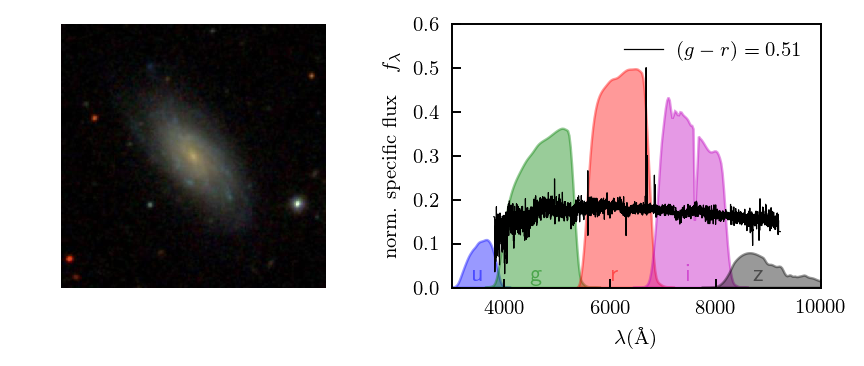

color limits: 0.55 0.65
computed g-r =  0.781758036735
catalog g-r= [ 0.71475601]


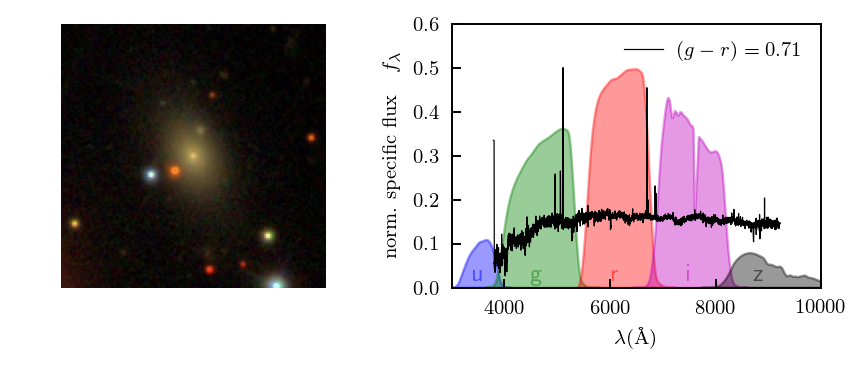

color limits: 0.65 0.75
[========================================]  182.8kb / 182.8kb   
caching to C:\Users\h2_sf\astroML_data\SDSSspec\2493\spSpec-54115-2493-542.fit
computed g-r =  0.807732173688
catalog g-r= [ 0.77199936]


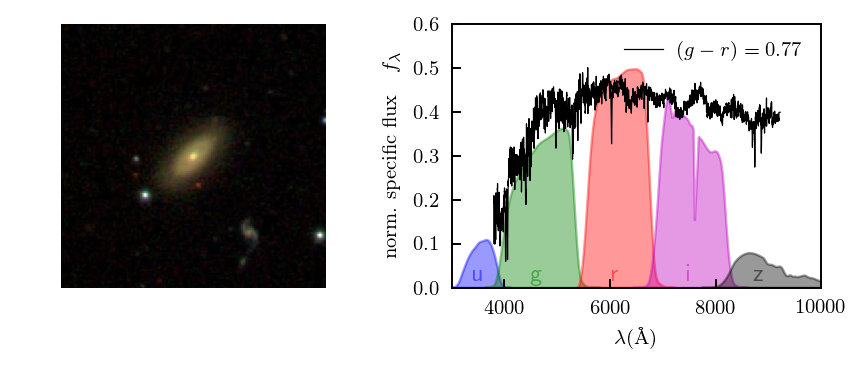

color limits: 0.75 1.0
[========================================]  182.8kb / 182.8kb   
caching to C:\Users\h2_sf\astroML_data\SDSSspec\2773\spSpec-54533-2773-462.fit
computed g-r =  0.882185869379
catalog g-r= [ 0.82063293]


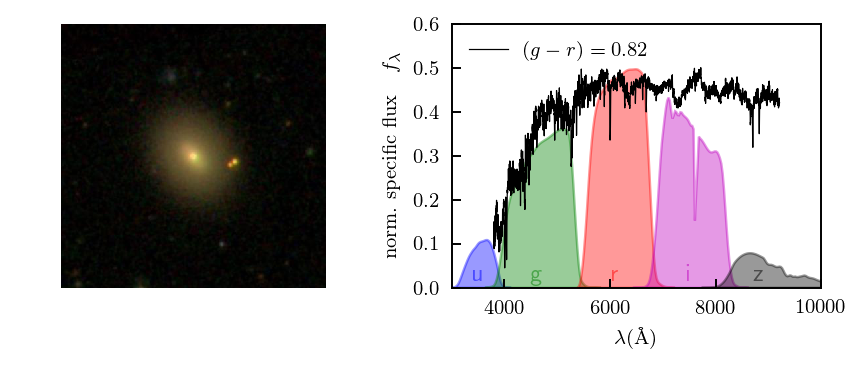

In [24]:
import numpy as np

from code.plot_utils import plot_image_spec_sdss_galaxy

cbins = [0.2,0.55,0.65,0.75,1.0]

for ic, c in enumerate(cbins[:-1]):
    colsel = data[(gr>c) & (gr<cbins[ic+1]) & (d_A<100) & (Mcmodel < -20.)]
    print "color limits:", c, cbins[ic+1]
    iran = np.random.randint(0,np.size(colsel)-1,1)
    randobj = colsel[iran]
    figname = 'figtmp/gal_img_spec'+'_'+str(randobj['objID'])+'.pdf'
    plot_image_spec_sdss_galaxy(randobj) #, save_figure=figname)

Compare the apsectra above to the spectra of stars of different type (see <a href="http://adsabs.harvard.edu/abs/1984ApJS...56..257J">Jacoby et al. 1984</a> for a comprehensive library of stellar spectra):

<img src="https://www.cliffsnotes.com/assets/23383.jpg"></img>

### The challenge of measuring galaxy luminosities

The flux density, $f_\lambda$, has a simple meaning, but its measurement is often non-trivial in practice because it requires integration of photons over some area on the sky. For point sources like stars and quasars the total flux can simply be collected from an area that encloses the telescope point spread function, although for stars in crowded regions even this task is non-trivial. Galaxies, however, are intrinsically extended and diffuse (as discussed earlier, this is the reason they were dubbed ``nebulae'') and collecting flux associated with galaxies requires either defining a galaxy boundary or devising some way to calculate the total flux. 

The difficulty is reflected in a variety of ways that galaxy magnitudes are computed. Whenever you hear about galaxy luminosity or stellar mass (or half-light radius) you should be aware of the method used to compute magnitudes from which these quantities are derived.

### Surface brightness.

Another important property is galaxy surface brightness, defined as the amount of light that we receive from a given area of the galaxy. This quantity makes sense for extended object where we can compare amount of light we get from an area from the total amount of light we can get from a point source. 

We cannot estimate luminosity without distance, but we can compute surface brightness in units of magnitude per square arcsec - i.e., the flux in the $r$-band magnitudes we receive from an area $d\Omega$ in $\mathrm{arcsec}^2$: $\mu_r=-2.5\log_{10}(f_r/d\Omega) + \mathrm{const}=m_r+2.5\log_{10}d\Omega$.


### Models of the surface brightness profiles of galaxies 

The choice of  $d\Omega$ depends on one's goals. For example, we can define $d\Omega$ to be an annulus of radius $R$ and thickness $\Delta R$, as is done in the estimates of the Petrosian magnitudes (see below). 
Or we can estimate surface brightness in equal size square (or other shape) patches of a given $d\Omega$.

Note that we can always express the flux $f_{\rm f}$ in the above equation in terms of intrinsic luminosity in the same filter: $f_{\rm f}\propto L_{\rm f}/d^2$, where $d$ is galaxy distance. Thus, $\mu_{\rm f}$ and  $\Sigma_{\rm f}=L_{\rm f}/\mathcal{A}$, where $\mathcal{A}$ is a physical area (see Appendix A.5 in the class notes for the exact relation) and we can talk about $\mu_{\rm f}$ and $\Sigma_{\rm f}$ interchangeably.  

Often, $L_{\rm f}$ is also converted into an estimate of stellar mass of the underlying stellar population stellar using some type of population modelling, as discussed below. In these cases we talk about stellar surface density, $\Sigma_\ast$. 

### Sersic surface brightness/density profile
<br>
$$
\Sigma(R)=\Sigma_e\exp\left\{-b_n\left[\left(\frac{R}{R_e}\right)^{1/n}-1\right]\right\},
$$
where $\Sigma_e$ is the surface brightness at the effective radius $R_e$ that encloses half of the total light from the model. The constant $b_n$ is related to $n$ -- the S\'ersic index -- that controls the overall shape of the profile.  Its detailed properties are well described by <a href="http://adsabs.harvard.edu/abs/2005PASA...22..118G">Graham & Driver (2005)</a> (see <a href="http://ned.ipac.caltech.edu/level5/March05/Graham/Graham2.html">here</a> for the online version). In particular, $b_n = 1.9992n - 0.3271$. This is an approximation, but a very accurate one. The profile above is sometimes expressed as
$$
\Sigma(R)=\Sigma_0\exp\left[-\left(\frac{R}{R_d}\right)^{1/n}\right],
$$
where $\Sigma_0=\Sigma_e \exp(b_n)$ and $R_d\equiv R_e/b_n^n$ is the scale length. 

If profiles are constructed using magnitudes rather than surface brightness or intensity, the corresponding expression is:  
$$
\mu(R)=\mu_e+\frac{2.5b_n}{\ln(10)}\left[\left(\frac{R}{R_e}\right)^{1/n}-1\right], 
$$
where $R_e$ is the half-light radius and $n$ is the Sersic index. 

Let's plot the Sersic profile for different values of $n$

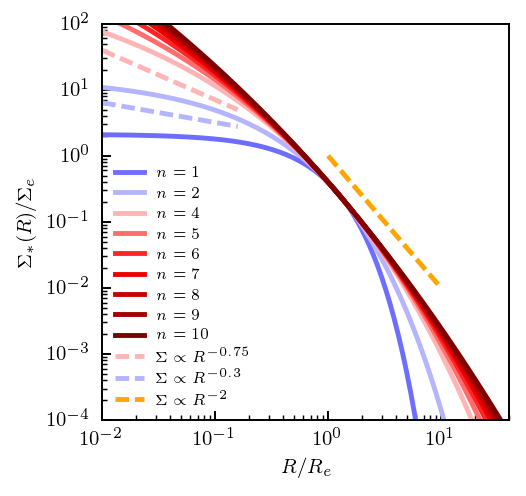

In [10]:
import matplotlib.cm as cm
import matplotlib.colors as colors

fig = plt.figure(figsize=(3, 3))

plt.xlabel ('$R/R_e$')
plt.ylabel (r'$\Sigma_{*}(R)/\Sigma_e$')

plt.xlim(0.01, 40.); plt.ylim(0.0001, 100.)
plt.xscale('log'); plt.yscale('log')
plt.rc('font',size=10)

x = np.linspace(-2., 1.7, 200)
x = np.power(10.,x)
me = 1.0; Re=1.0

cnorm  = colors.Normalize(vmin=1, vmax=15)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.seismic)

# constract surface brightness profiles
for n in range(1,11,1):
    bn = 1.9992*n-0.3271
    spro = np.power(10.0,-0.4*(me + 2.5*bn*(np.power(x/Re,1.0/n)-1.0)/np.log(10.)))
    color = scalarmap.to_rgba(n+5)
    if n != 3: plt.plot(x,spro,'-', c=color, lw=2.0, label='$n=%i$'%n)

# plot power law for comparison:
x1 = np.linspace(-2., -0.8, 5); x2 = np.linspace(0., 1., 5)
x1 = np.power(10.,x1); x2 = np.power(10.,x2)
y1 = 1.6*np.power(x1,-.3); y2 = 1.*np.power(x2,-2.0)
y3 = 1.25*np.power(x1,-0.75)
#
color = scalarmap.to_rgba(4+5)
plt.plot(x1,y3,'--', c=color, lw=2.0, label=r'$\Sigma\propto R^{-0.75}$')
color = scalarmap.to_rgba(2+5)
plt.plot(x1,y1,'--', c=color, lw=2.0, label=r'$\Sigma\propto R^{-0.3}$')
plt.plot(x2,y2,'--', c='orange', lw=2.0, label=r'$\Sigma\propto R^{-2}$')

plt.legend(loc='lower left', frameon=False, fontsize=6)
#plt.title('Sersic profiles')
#plt.grid()
#plt.savefig('fig/sersic_pro.pdf', bbox_inches='tight')
plt.show()


### Exponential and de Vaucouleurs profiles 

The exponential and de Vaucouleurs profiles are specific cases of the Sersic profile for $n=1$ and $n=4$, respectively. 

The exponential profile is thus given by:
$$\mu(R)=\mu_e+\frac{2.5b_1}{\ln(10)}\left[\frac{R}{R_e}-1\right],
$$
where $b_1=1.678$. $R_e$ defined here encloses half of the total light of the profile. Note that this linear increase in magnitude per area corresponds to an exponential decrease in luminosity per area, thus the name. 

The de Vaucouleurs profile is given by $n=4$:
$$
\mu(R)=\mu_e+\frac{2.5b_4}{\ln(10)}\left[\left(\frac{R}{R_e}\right)^{1/4}-1\right],
$$
where $b_4=7.669$. Here too $R_e$ encloses half of the light is enclosed within $R_e$.


### Surface density profiles of real galaxies

Note that in the figures below, surface brightness is plotted in terms of surface mass density; these are related to $\mu$ via equations above.  

### Spheroidal galaxies (early types)

We will plot best fit Sersic profiles to a sample of nearby early type galaxies presented by <a href="http://adsabs.harvard.edu/abs/2013ApJ...763...73S">Szomoru et al. (2013)</a>. The file with profiles (<a href="http://astro.uchicago.edu/~andrey/classes/a304s17/data/szomoru12_tab1.txt">is in the data directory</a>).

plotting spheroidal galaxies with min, max log(M*): 10.7 11.57


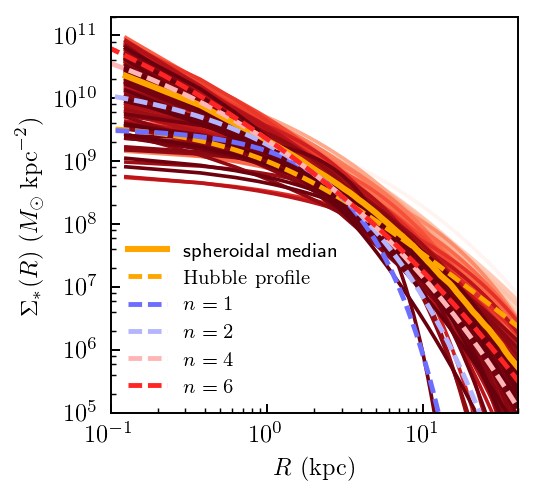

In [11]:
# read galaxies from the Szomoru et al. 2012 sample
from code.setup import data_home_dir
import numpy as np

gal, zs, lms, rhs, ns,ens=np.loadtxt(data_home_dir()+'szomoru12_tab1.txt',usecols=(0,1,2,16,22,23),unpack=True);
ms = 10.0**lms

dr = 0.25; rpro = []; spro = []; mspro = []; rhpro = []; n = 0 

from scipy import special as sp
from math import gamma
for i, zd in enumerate(zs):
    if (zd < 0.1) and (ns[i] < 15) :
        n = n + 1; b = 2.0*ns[i]-0.324
        # characteristic surface density
        sig0 = ms[i]*b**(2.0*ns[i])/(4.0*np.pi*rhs[i]**2*ns[i]*sp.gammainc(2.0*ns[i],b)*gamma(2.0*ns[i]))
        rd = -dr*0.5; sig = []; r = []
        sn2 = ms[i]/(2.0*np.pi*(1.34*rhs[i])**2)
        # generate Sersic profiles from the given parameters
        for j in range(160):
            rd = rd + dr
            sigd = sig0*np.exp(-b*(rd/rhs[i])**(1.0/ns[i]))
            r.append(rd)#/rhs[i])
            sig.append(sigd)
        mspro.append(ms[i]); rhpro.append(rhs[i])
        rpro.append(r)
        spro.append(sig)

# plot 
fig = plt.figure(figsize=(3, 3))
plt.xlabel ('$R\ (\mathrm{kpc})$')
plt.ylabel (r'$\Sigma_{*}(R)\ (M_{\odot}\,\mathrm{kpc}^{-2})$')
plt.rc('font',size=10)

plt.xlim(0.1, 40.); plt.ylim(1.e5, 2.e11)
plt.xscale('log'); plt.yscale('log')

cnorm  = colors.Normalize(vmin=0, vmax=n-1)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.Reds)

mspro = np.array(mspro)
msmin = np.log10(mspro.min()); msmax = np.log10(mspro.max())
print "plotting spheroidal galaxies with min, max log(M*):", msmin, msmax
ims = np.argsort(mspro)

for id in range(n-1,0,-1):
    i = ims[id]
    nms = int((n-1)*(np.log10(mspro[i])-msmin)/(msmax-msmin))
    color = scalarmap.to_rgba(n-nms)
    plt.plot(rpro[i],spro[i],'-', color=color, lw=1.5)

# plot median of the profiles of spheroidal galaxies
rmed = []; sszmed =[]; rpro = np.array(rpro); spro = np.array(spro)
for i in range(np.shape(rpro[0])[0]):
    rdmed = np.median(rpro[:,i])
    sdmed = np.median(spro[:,i])
    rmed.append(rdmed); sszmed.append(sdmed)

plt.plot(rmed, sszmed, c='orange', lw=2.5, label='spheroidal median')

# some historical profiles used to describe surface brightness profiles of spheroids
# Hubble 1930 profile
x = np.linspace(-2, 2., 300)
x = np.power(10.,x)
spro = 4.0e9*np.power((x + 1.), -2.0)
plt.plot(x,spro,'--', c='orange', lw=2.0, label=r'$\rm Hubble\ profile$')

se = 22.0; Re=2.0

# constract surface brightness profiles
cnorm  = colors.Normalize(vmin=1, vmax=15)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.seismic)

for n in [1,2,4,6]:
    bn = 1.9992*n-0.3271
    color = scalarmap.to_rgba(n+5)
    spro = np.power(10.0,-0.4*(-se + 2.5*bn*(np.power(x/Re,1.0/n)-1.0)/np.log(10.)))
    plt.plot(x,spro,'--', c=color, lw=2.0, label='$n=%i$'%n)

plt.legend(loc='lower left',fontsize=8,frameon=False)
#plt.savefig('fig/szomoru_pro.pdf', bbox_inches='tight')

plt.show()


### Spiral galaxies (late types)

The plot below shows stellar surface density profiles of late type spiral galaxies from the samples of Leroy et al. (2007) and LITTLE THINGS (Zhang et al. 2012). It uses the file you can get <a href="http://astro.uchicago.edu/~andrey/classes/a304s17/data/spro.dat">here</a>. 

Galaxies in this sample span several orders of magnitude in luminosity and to compare their profiles, I am rescaling the radii by the radius containing half of the light, $R_{50}$, and normalizing surface density by the surface density within $R_{50}$. 

plotting disk galaxies with min, max log(M*): 6.9 11.0


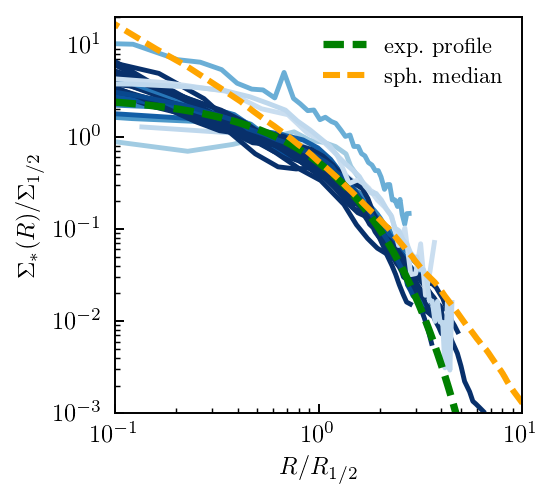

In [12]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
from code.setup import data_home_dir

msmin = 6.9; msmax = 11.0

def read_plot_disk_profiles(snormalize=False):
    """ read stellar surface density profiles of a representative collection of disks from dwarfs to massive spirals"""
    ngal = 0 
    with open(data_home_dir()+'things_spro.dat') as input_file:
        lines = input_file.readlines()
        for line in lines:
            cols = line.split()
            if len(cols) == 6:
                if ngal > 0: 
                    nms = int(5+25.*(ms[0]-msmin)/(msmax-msmin))
                    color = scalarmap.to_rgba(nms)
                    # Msun/pc^2 -> Msun/kpc^2
                    spro = np.array(spro) * 1.e6
                    if snormalize: spro /= (0.5*10.**ms[0]/(np.pi*rh[0]**2))   
                    plt.plot(np.array(rpro)/rh[0], spro, c = color, lw=2.) #, label=r'$\rm %s$'%gname[0])
                ngal += 1;
                gname = []; ms = []; rh = []; nr = []; rpro = []; spro = [];
                # read gal. name, half-mass radius, log(M*), log(Mgas)
                gname.append(cols[0]); rh.append(float(cols[1])); ms.append(float(cols[3])); nr.append(float(cols[5]))
            else:
                rpro.append(float(cols[0])); spro.append(float(cols[1]))
        # last galaxy is exponential profile of the Milky Way
        # Msun/pc^2 -> Msun/kpc^2
        #spro = np.array(spro)*1.e6
        #if snormalize: spro /= ((0.5*10.**ms[0]) /(np.pi*rh[0]**2))
        #plt.plot(np.array(rpro)/rh[0], spro, c = 'b', lw=2., label=r'$\rm %s$'%gname[0])
    return

# plot 
fig = plt.figure(figsize=(3., 3.))

plt.xlabel ('$R/R_{1/2}$')
plt.ylabel (r'$\Sigma_{*}(R)/\Sigma_{1/2}$')
#plt.ylabel (r'$\Sigma_{*}(R)\ \rm (M_{\odot}/kpc^2)$')

plt.rc('font',size=10)
plt.xlim(0.1, 10.); 
#plt.ylim(1e4, 2.e10)
plt.ylim(0.001, 20.)
plt.xscale('log'); plt.yscale('log')

cnorm  = colors.Normalize(vmin=0, vmax=22)
scalarmap = cm.ScalarMappable(norm=cnorm, cmap=cm.Blues)

print "plotting disk galaxies with min, max log(M*):", msmin, msmax

read_plot_disk_profiles(snormalize=True)

# exponential profile
x = np.linspace(-2., 1.7, 200)
x = np.power(10.,x)

# for exponential disks R1/2 = 1.678 R_d
k=1.678; me = k*k

spro = me*np.exp(-k*x)
plt.plot(x,spro,'--', c='g', lw=3.0, label=r'$\rm exp.\ profile$')

# median of spheroidal galaxies
rhmed = np.median(rhpro)
snorm = 0.5*0.5*np.median(mspro)/(np.pi*rhmed**2)
plt.plot(rmed/rhmed, sszmed/snorm, '--', c='orange', lw=2.5, label=r'$\rm sph.\ median$')

plt.legend(loc='upper right',fontsize=9,frameon=False)
#plt.savefig('fig/things_pro.pdf', bbox_inches='tight')
plt.show()



### Aperture and Holmberg magnitudes

One of magnitudes provided in the SDSS database, called $m_{\rm fiber}$, is based on light integrated within a fixed aperture of radius $1.5^{\prime\prime}$. However, it is a bad idea to use such fixed aperture magnitudes for physical studies of galaxies, because this would correspond to different physical scales for galaxies of different intrinsic size and galaxies of the same type but at different distances. 


An example of a radius definition that does not suffer from these problems is the Holmberg radius, defined as the major axis of the observed galaxy's ellipsoidal light distribution. which itself is defined as the contour at which surface brightness of a galaxy in the $B$ band is equal to $26.5$  magnitudes per square arcsecond (<a href="http://adsabs.harvard.edu/abs/1958MeLuS.136....1H">Holmberg 1958</a>). Similar definitions could of course be used for other bands. This definition works as long as observations allow for measures of surface brightness to $26.5\rm\ mag\,arcsec^{-2}$ reliably. What if this is not the case, like when a galaxy is far away or when observations are shallow?

### Petrosian magnitudes 

<a href="http://adsabs.harvard.edu/abs/1976ApJ...209L...1P">Petrosian (1976)</a> proposed to measure radii based on the integrated galaxy flux to make such estimates more robust. The idea is that as one traces the surface brightness profile $\Sigma(R)$, one can compare the light within some shell of thickness $\Delta R/R$, $\Delta \Sigma$, to the total light within $R$, $\Sigma(\le R)$ and define the galaxy (Petrosian) radius, $R_{\rm P}$, as the radius corresponding to $\Delta \Sigma=\eta \Sigma(\le R_{\rm P})$. One could then tune $\eta$ in such a way that the measurement recovers all or most of the flux for a particular assumed form of the profile $\Sigma(R)$ extending to infinity. 


Specific implementation of this definition in the SDSS  (see <a href="http://skyserver.sdss.org/dr1/en/help/docs/algorithm.asp?key=mag_petro">here</a> for more details) computes the following function as a function of angular radius, $R$, from galaxy center:
$$
\eta(R)\equiv\frac{\int_{0.8R}^{1.25R}dR^\prime 2\pi R^\prime \Sigma(R^\prime)/[\pi(1.25^2-0.8^2)R^2]}{\int^R_02\pi R^\prime \Sigma(R^\prime) dR^\prime/(\pi R^{2})}
$$
where $\Sigma(r)$ is the surface brightness profile. The <b>Petrosian radius</b>, $R_{\rm P}$, is then defined by the SDSS pipeline as the radius where $\eta(R_{\rm P})=0.2$.
Galaxy flux is then measured within some multiple of $R_{\rm P}$:
$$
F_{\rm P}\equiv \int^{N_{\rm P}R_{\rm P}}_0 2\pi R^\prime \Sigma(R^\prime)dR^\prime
$$
The aperture $2R_{\rm P}$ used in the SDSS measurements. 

### Petrosian magnitudes: continued

The choices for $\eta$ and $N_{\rm P}$ are heuristic. $N_{\rm P}$ is chosen to be large enough to contain nearly all of the flux for many galaxies (in particular late type galaxies described by the exponential profile), but small enough that the sky noise is sub-dominant in the estimate of $F_{\rm P}$. In this case, even substantial errors in $R_{\rm P}$ cause only small errors in the Petrosian flux (typical statistical errors near the spectroscopic flux limit of $r \sim 17.7$ are $< 5\%$). The 
 main draw of the Petrosian's definition, however, is that the fraction of recovered light is robust and depend  only weakly on the galaxy axis ratio or size variation due to worse seeing or greater distance. 

One can show that theoretically the Petrosian magnitudes defined as in the SDSS should recover almost all of the flux of an exponential galaxy profile and about 80% of the flux for a de Vaucouleurs profile.

However, galaxy surface brightness profiles are often described by different functions (corresponding to different components) at different radii. Thus, in practice the Petrosian magnitude may underestimate total galaxy light by $\approx 0.2-0.5$ mag. The magnitude of the underestimate depends on the fraction of light in the outer component, which increases with increasing galaxy luminosity. 
 
Thus, this underestimate will affect the brightest galaxies the most (see <a href="http://adsabs.harvard.edu/abs/2013MNRAS.436..697B">Bernardi et al. 2013)</a>). This issue will come up in the practical calculation of the galaxy luminosities and luminosity function we will discuss next week. 

### Petrosian magnitudes and radii in SDSS, light concentration

The Petrosian radius in each band is the parameter <tt>petroRad</tt> in the SDSS database with the subscript corresponding to 
particular filter (e.g., for $r$-band, <tt>petroRad_r</tt>) and the Petrosian magnitude in each band (calculated using only petroRad for the $r$ band) is the parameter petroMag (e.g., for $r$-band, <tt>petroMag_r</tt>) . 

SDSS main galaxy sample  also provides radii enclosing 50% and 90% of the total light of the Petrosian magnitude (e.g., <tt> petroR50_r</tt> and <tt>petroR90_r</tt> for the $r$ band). 


<tt>petroR50_r</tt> and <tt>petroR90_r</tt> can be used to define <b>concentration</b> of galaxy light in the $r$-band:
$$c_r = {\tt petroR90\_r/petroR50\_r},$$
which describes how compact is the surface brightness profile. Concentration is one of the quantities that correlate with galaxy morphology and can be measured fairly reliably even for faint galaxies, for which visual morphology is difficult to determine. Thus, it is useful to characterize distant faint galaxies. 

### model magnitudes

An alternative way is to estimate total magnitude by using an extrapolation of the model for surface brightness profiles obtained via a fit to the regions of the galaxy where the light profile is measured reliably. One could, for example, perform a fit of one of the surface brightness profile models discussed above or their combination. The total model magnitude is then obtained by integrating the best fit model profile to infinity. 

The SDSS pipeline measures <a href="http://classic.sdss.org/dr7/algorithms/photometry.html">two kinds of model magnitudes</a> based on fits of the exponential and de Vaucouleurs profiles to each galaxy in the $r$-band (the most sensitive band). The goodness of fit is evaluated for each of these models and the profile 
providing a better fit is chosen as the surface brightness profile model for computing SDSS model magnitudes. The model magnitudes are then computed by integrating this model to infinity.

### cmodel magnitudes

On the other hand, cmodel magnitudes use  surface brightness profile model constructed as a linear combination of  the exponential and de Vaucouleurs models used to define model magnitudes in the $r$ band: $F_{\rm composite} = {\rm fracDeV} \cdot F_{\rm deV} + (1 - {\rm fracDeV}) F_{\rm exp}$,
where $F_{\rm deV}$ and $F_{\rm exp}$ are the de Vaucouleurs and exponential surface brightness profiles computed using the corresponding independent model fits in the $r$ band. 

The cmodel magnitude is computed using fracdeV value that fits they surface brightness profile of a particular galaxy best. Among the magnitudes available for galaxies in the SDSS database, these magnitudes are recommended as the best choice for estimating galaxy luminosities and other physical properties. As we will see next week, however, for bright galaxies they still significantly underestimate the total light. So yet more sophisticated methods are employed to measure total galaxy light and sizes.

### Absolute magnitudes, extinction, $k$-, and evolution corrections

The absolute magnitude $M$ is the
astronomer's measure of luminosity, defined to be the apparent
magnitude the object in question would have if it were at 10~pc, so
$$
m=M+DM+K(z)+E(z)+e(z)
$$

where the <b>distance modulus</b> DM is defined by
$$
DM\equiv 5\,\log \left(\frac{D_{\rm L}}{10~{\rm pc}}\right)
$$
because it is the magnitude difference between an object's observed
bolometric flux and what it would be if it were at 10 pc (this
was once thought to be the distance to Vega which was the most commonly used standard star until recently).  

The term $K(z)$ is the so called <b>$k$-correction</b>:
<br>
$$
K(\lambda_0) = 2.5\,\log \left[(1+z)\,\frac{\int_0^{\infty} f(\lambda_0) S(\lambda)d\lambda}{\int_0^\infty f[\lambda_0/(1+z)]S(\lambda)d\lambda}\right],
$$
where $\lambda_0$ is the wavelength of the filter at $z_0$ to which we would like to correct the magnitudes. Computing $k$-correction requires good knowledge of galaxy spectra and its calibration is a complex business. Code implementing $k$-corrections for galaxies at $z\leq 0.5$ can be found in <tt>code/calc_kcor.py</tt> Some of the catalogs we will use, already include pre-computed value of $k$-correction for each galaxy. 

$E(z)$ is the <i>extinction correction</i>, which corrects for reddening of the galaxy light due to dust in the Milky Way. 

$e(z)$ is <i>evolution correction</i>, which takes into account evolution of galaxies in order to compare them across wide range of redshifts. We will discuss it more shortly. 

### Galaxy luminosity

Given the galaxy absolute magnitude $M_{\rm f}$ estimated for a given filter using equations above, we can compute galaxy luminosity in units of solar luminosity in the same filter as 
$$
L_{\rm f} = 10^{0.4(M_{\odot,\rm f}-M_{\rm f})},
$$
where $M_{\odot,\rm f}$ is the absolute magnitude of the Sun in the same band (see, e.g., eq. 14 <a href="http://adsabs.harvard.edu/abs/2003ApJ...592..819B">Blanton et al. 2003</a> for the SDSS bands and <a href="http://mips.as.arizona.edu/~cnaw/sun.html">here</a> for many other commonly used bands).

Now that we've covered the definitions of magnitudes and how to convert them to luminosities, let's define a galaxy sample of SDSS galaxies and explore it. 

### Collage of thumbnail images of SDSS galaxies from the spectroscopic sample

Display a random selection of galaxies with a given range of parameters in an array (collage) of thumbnail images.

selected 612236 galaxies


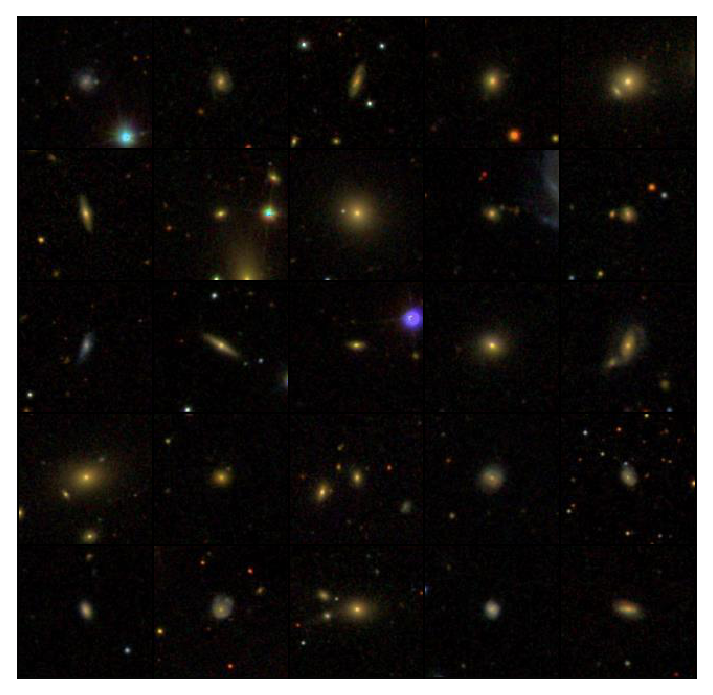

In [69]:
from code.plot_utils import sdss_img_collage

# the number of rows and columns in the image collage
nrow = 5; ncol = 5
# pixel size of the thumbnails to extract from the SDSS
npix = 130

# minimum and maximum luminosity distances for galaxy selection
Dmin = 20.; Dmax = 1000.; 
# absolute magnitude limit on the faint end
Mlim = -11.0

# select galaxies with these distance and absolute magnitude limits
rdata = data[(Mcmodel < Mlim) & (d_L > Dmin) & (d_L < Dmax)]

print("selected %d galaxies"%np.size(rdata))
# select a random subset of galaxies from the selected subset
iran = np.random.randint(0., np.size(rdata)-1, nrow*ncol)
# get data for the randomly selected galaxies
dshow = rdata[iran]
objs = dshow['objID']; ras = dshow['ra']; decs = dshow['dec']

# get images (if they are not yet on disk) and display the collage 
sdss_img_collage(objs, ras, decs, nrow, ncol, npix, scale=0.5)

<b>Question:</b> Most galaxies selected with these parameters look like faint smudges with hard to see details. Why? What is the most common morphological type of these galaxies?

### Distribution of apparent magnitudes of galaxies as a function of redshift

In [44]:
from colossus.cosmology import cosmology
from code.plot_utils import plot_2d_dist

def plot_mz(x,y, xlim,ylim,nxbins,nybins,xlabel,ylabel,savefig=None):
    """
    plot a binned histogram showing distribution of galaxies in the apparent magnitude-redshift plane
    along with the expected m-z relation expected for a "standard candle" (object of fixed luminosity)
    + the same with correction for evolution (e-korrection) and spectrum redshift (k-correction)
    """
    fig, ax = plt.subplots(figsize=(3., 3.))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    
    plot_2d_dist(x,y, xlim,ylim, nxbins, nybins, xlabel=xlabel, ylabel=ylabel, fig_setup=ax)
    
    # plot curve showing m-z relation for the constant luminosity ignoring K correction
    # set cosmology to the best values from 9-year WMAP data
    cosmo = cosmology.setCosmology('WMAP9')
    zd = np.linspace(x.min(), x.max(), 100)
    dlum = cosmo.luminosityDistance(zd)/cosmo.h
    # and k-correction using polynomial approximations of Chilingarian et al. 2010
    # see http://kcor.sai.msu.ru/getthecode/
    from code.calc_kcor import calc_kcor 
    # this k-correction is not designed for z>0.6, so limit the z for correction calculation
    grzd = np.ones_like(zd); grzd = 0.8*grzd
    kcorr = calc_kcor('r', zd, 'g - r', grzd)

    mcandle = -23. + 5.*np.log10(dlum*1.e6/10.)
    mcandlevol = -23. + 5.*np.log10(dlum*1.e6/10.) - 1.3*zd
    mcandlevolkcorr = -23. + 5.*np.log10(dlum*1.e6/10.) - 1.3*zd + kcorr
    plt.plot(zd, mcandle, '--', c='r', lw=2., label=r'$\mathrm{st.\ candle}\ M_r=-23$')
    plt.plot(zd, mcandlevol, '--', c='darkorange', lw=1.5, label=r'$\mathrm{+evo\ correction}$')
    plt.plot(zd, mcandlevolkcorr, '--', c='y', lw=1., label=r'$\mathrm{+evo+k\ corrections}$')
    
    if savefig != None:
        plt.savefig(savefig,bbox_inches='tight')
        
    plt.legend(loc='lower right', fontsize=8, frameon=False)
    plt.show()
    return

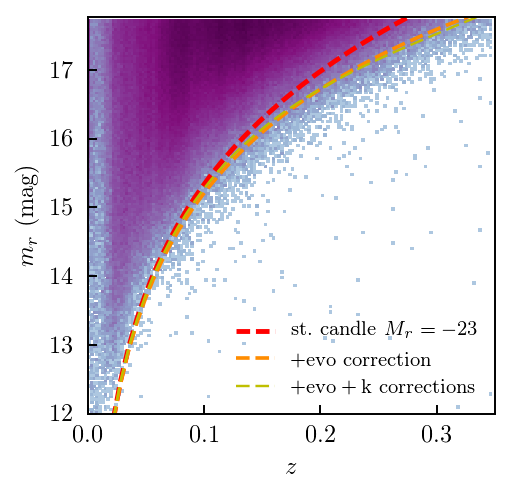

In [45]:
from code.read_sdss_fits import read_sdss_fits
from code.setup import data_home_dir

# read fits file with the SDSS DR8 main spectroscopic sample
adata = read_sdss_fits(data_home_dir()+'SDSSspecgalsDR8full.fit')

mlim = 17.77
za = adata['z']
mra = adata['petroMag_r'] - adata['extinction_r']
adata = adata[mra<mlim]; za = za[mra<mlim]; mra = mra[mra<mlim]

#------------------------------------------------------------
# plot m-z diagram

zlim = [0.0, 0.35]; mrlim = [12.,mlim]
plot_mz(za, mra,  xlim=zlim, ylim=mrlim, nxbins=151, nybins=151, 
             xlabel=r'$z$', ylabel=r'$m_{r}\ \mathrm{(mag)}$', savefig='fig/mappz_sdss.png')


<img width=500 align=left src="fig/mappz_sdss.png"></img>

Now let's plot distribution of absolute magnitude vs redshift for the same galaxies

In [43]:
def plot_Mz(x,y, xlim,ylim,nxbins,nybins,xlabel,ylabel,savefig=None):
    fig, ax = plt.subplots(figsize=(3., 3.))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    #
    plot_2d_dist(x,y, xlim,ylim,nxbins,nybins,xlabel=xlabel,ylabel=ylabel,fig_setup=ax)

    zd = np.linspace(x.min(), x.max(),100)
    dld = cosmo.luminosityDistance(zd)/cosmo.h
    # main galaxy magnitude limit
    Mlim = 17.77 - 5.*np.log10(dld*1.e6/10.)
    from code.calc_kcor import calc_kcor 
    # this k-correction is not design for z>0.5, so limit the z for correction calculation
    grzd = np.ones_like(zd); grzd = 0.8*grzd
    kcorr = calc_kcor('r', zd, 'g - r', grzd)

    mcandle = -23.*np.ones_like(zd)
    mcandlevol = -23. - 1.3*zd
    mcandlevolkcorr = -23. - 1.3*zd + kcorr

    plt.plot(zd, Mlim, '--', c='m', lw=2., label=r'$\mathrm{SDSS\ spec.\ sample}\ m_{\rm lim}=17.77$')
    plt.plot(zd, mcandle, '--', c='r', lw=2., label=r'$\mathrm{st.\ candle}\ M_r=-23$')
    plt.plot(zd, mcandlevol, '--', c='darkorange', lw=1.5, label=r'$\mathrm{+evo\ correction}$')
    plt.plot(zd, mcandlevolkcorr, '--', c='y', lw=1., label=r'$\mathrm{+evo+k\ corrections}$')

    if savefig != None:
        plt.savefig(savefig,bbox_inches='tight')
    plt.legend(loc='upper right', fontsize=8, frameon=False)
    plt.show()
    return



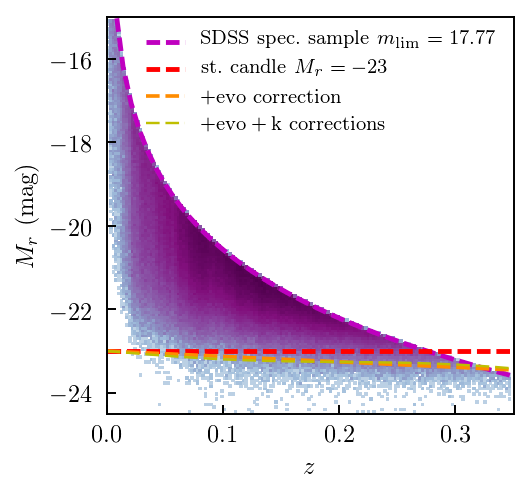

In [40]:
cosmoa = cosmology.setCosmology('WMAP9')
dluma = cosmo.luminosityDistance(za)/cosmo.h

Mra = mra - 5.0*np.log10(dluma/1e-5) 

Mrlim = [-24.5,-15.]
plot_Mz(za, Mra,  xlim=zlim, ylim=Mrlim, nxbins=151, nybins=151, 
             xlabel=r'$z$', ylabel=r'$M_{r}\ \mathrm{(mag)}$', savefig='fig/Mabsz_sdss.png')

<img width=500 align=left src="fig/Mabsz_sdss.png"></img>

### Large-scale structure in galaxy distribution on the sky

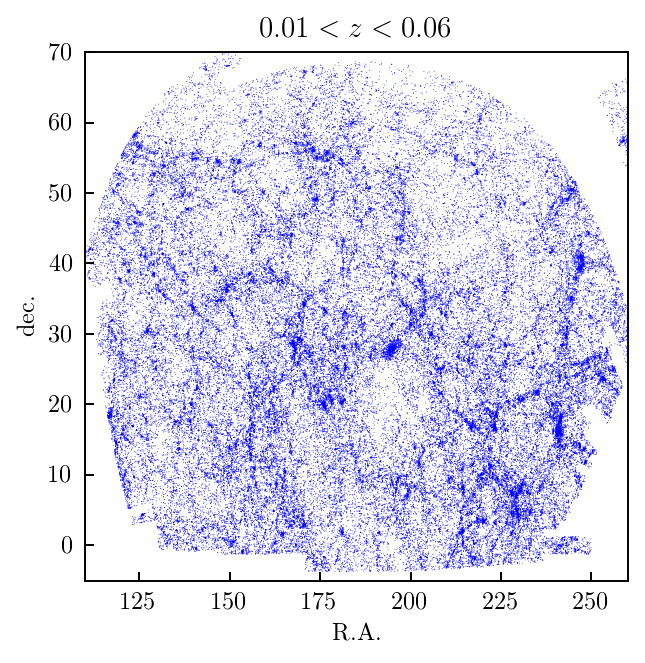

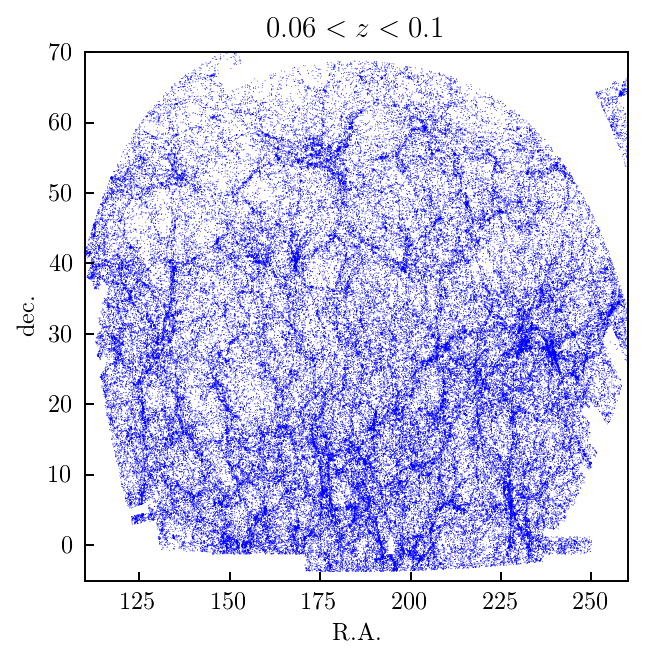

In [28]:
"""
plot distribution of SDSS galaxies on the sky

"""
# RA and DEC cuts
datac = adata[(adata['dec'] > -10) & (adata['dec'] < 75) & (adata['ra'] > 100) & (adata['ra'] < 270)]
z = datac['z']

datap = datac[(z > 0.01) & (z < 0.06)]

xlabel = r'$\mathrm{R.A.}$'; ylabel = r'$\mathrm{dec.}$'
xlim = [110.,260.]; ylim =[-5.,70]

# Plot the results

fig = plt.figure(figsize=(4, 4))
plt.xlim(xlim); plt.ylim(ylim)
plt.xlabel(r'$\mathrm{R.A.}$')
plt.ylabel(r'$\mathrm{dec.}$')
plt.scatter(datap['ra'],datap['dec'], marker='.', edgecolor='none', color='blue', s=.5, alpha=1.)
plt.title(r'$0.01<z<0.06$')
plt.savefig('fig/sky_lss_z006.png')
plt.show()

datap = datac[(z > 0.06) & (z < 0.1)]
fig = plt.figure(figsize=(4, 4))
plt.xlim(xlim); plt.ylim(ylim)
plt.xlabel(r'$\mathrm{R.A.}$')
plt.ylabel(r'$\mathrm{dec.}$')
plt.scatter(datap['ra'],datap['dec'], marker='.', edgecolor='none', color='blue', s=.5, alpha=1.)

plt.title(r'$0.06<z<0.1$')
plt.savefig('fig/sky_lss_z010.png')
plt.show()


<img width=500 align=left src="fig/sky_lss_z006.png"></img>

 <img width=500 align=left src="fig/sky_lss_z010.png"></img>

### The Malmquist bias

The apparent magnitude limit of the SDSS spectroscopic galaxy sample ($m_{r, \rm Petro}<17.77$) imposes a severe limitation in our ability to study properties of the faintest galaxies, as it limits the faint sample to only the nearest redshifts (i.e., a small volume). At the same time, as we can see from the figures above, at $z\lesssim 0.05$ we don't have a sufficiently large number of bright galaxies to probe the bright end of the distribution reliably.

We can get a good number of bright galaxies if we include galaxies with redshifts $z>0.05$, but then we 
 are incomplete at faint magnitudes. This difficulty is a manifestation of the <b>Malmquist bias</b> (<a href="http://adsabs.harvard.edu/abs/1922MeLuF.100....1M">Malmquist 1922</a>) -- the fact that only the brightest objects are visible at large distances for a flux (or magnitude) limited sample. If one is not careful, bright, distant galaxies will dominate the sample.  

### $V_{\rm max}$ correction

The most commonly used way to correct for the Malmquist bias is the <b>$V_{\rm max}$ correction</b> (<a href="http://adsabs.harvard.edu/abs/1968ApJ...151..393S">Schmidt 1968</a>, see the beginning of Section VII on p. 403).

$V_{\rm max}$ is the volume within which a given galaxy would be visible given the apparent magnitude limit of the survey, or any other selection limits of the survey, in general. A galaxy of apparent magnitude $m$ at redshift $z$, has absolute magnitude

$$ M = m - 5\log_{10}\left(\frac{d_{\rm L}(z)}{10\,\rm pc}\right)$$
and would be visible out to $d_{\rm L, max}$ defined by 

$$
M = m_{\rm lim} - 5\log_{10}\left(\frac{d_{\rm L,max}}{10\,\rm pc}\right)
$$
for a survey with apparent magnitude limit, $m_{\rm lim}$,
or (converting to Megaparsecs, i.e. $10\,\rm pc= 10^{-5}\ Mpc$):

$$
d_{\rm L,max}=10^{-5}\, 10^{0.2(m_{\rm lim}-M)}\ \rm Mpc.
$$

Once we have $V_{\rm max}$ for every galaxy, we can weigh each galaxy by the $1/V_{\rm max}$, whenever we want to construct a distribution with the correct relative abundances of faint and bright galaxies. 

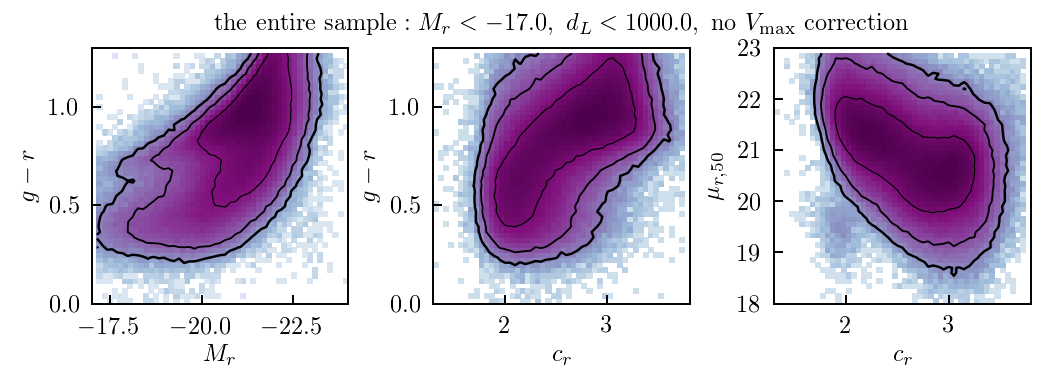

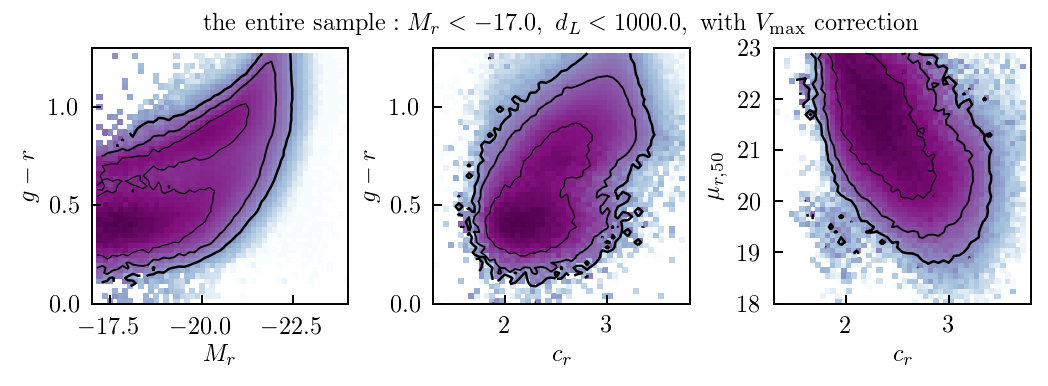

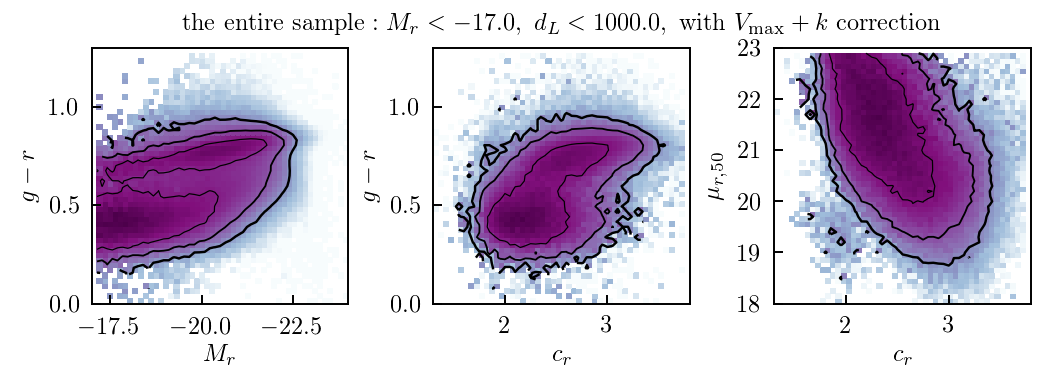

In [47]:
from code.plot_utils import plot_2d_dist

# select a sample of nearby SDSS galaxies down to a given distance and absolute magnitude
Mlim = -17.0; Dmax = 1000.
iloc = (Mcmodel < Mlim) & (d_A < Dmax)
locdata = data[iloc]; 
M_rl  = Mcmodel[iloc]
zl = locdata['z']
dAl = d_A[iloc]; vmaxiloc = vmaxi[iloc]
grl = locdata['modelMag_g'] - locdata['modelMag_r'] 
kcorr_g = calc_kcor('g', zl, 'g - r', grl)
kcorr_r = calc_kcor('r', zl, 'g - r', grl)
grl_kcorr = grl - kcorr_g + kcorr_r         
r50l = locdata['petroR50_r']; r90l = locdata['petroR90_r']; 
crl = r90l / r50l 
mul = locdata['petroMag_r'] - 2.5*np.log10(0.5) + 2.5*np.log10(np.pi*(r50l)**2)


Mrlim = [-24.,Mlim]; grlim = [0.,1.3];
crlim = [1.3,3.8]; sblim = [18., 23.]

clevs = [0.68, 0.95, 0.99]

fig, ax = plt.subplots(1,3,figsize=(6., 2.0))
fig.tight_layout()

ax[1].set_title(r'$\mathrm{the\ entire\ sample:}\ M_r<%.1f,\ d_L<%.1f,\ \mathrm{no}\ V_{\rm max}\ \mathrm{correction}$'%(Mlim,Dmax), fontsize=10)
plot_2d_dist(M_rl, grl, Mrlim, grlim, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$M_r$', ylabel=r'$g-r$', fig_setup=ax[0])

plot_2d_dist(crl, grl, crlim, grlim, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$c_r$', ylabel=r'$g-r$', fig_setup=ax[1])

plot_2d_dist(crl, mul, crlim, sblim, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$c_r$', ylabel=r'$\mu_{r,50}$', fig_setup=ax[2])

plt.savefig('fig/colcrmur_nocorr.png',bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,3,figsize=(6., 2.0))
fig.tight_layout()

ax[1].set_title(r'$\mathrm{the\ entire\ sample:}\ M_r<%.1f,\ d_L<%.1f, \ \mathrm{with}\ V_{\rm max}\ \mathrm{correction}$'%(Mlim,Dmax), fontsize=10)
plot_2d_dist(M_rl, grl, Mrlim, grlim,  weights=vmaxiloc, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$M_r$', ylabel=r'$g-r$', fig_setup=ax[0])

plot_2d_dist(crl, grl, crlim, grlim,  weights=vmaxiloc, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$c_r$', ylabel=r'$g-r$', fig_setup=ax[1])

plot_2d_dist(crl, mul, crlim, sblim,  weights=vmaxiloc, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$c_r$', ylabel=r'$\mu_{r,50}$', fig_setup=ax[2])

plt.savefig('fig/colcrmur_corr_Vmax.png',bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,3,figsize=(6., 2.0))
fig.tight_layout()

ax[1].set_title(r'$\mathrm{the\ entire\ sample:}\ M_r<%.1f,\ d_L<%.1f, \ \mathrm{with}\ V_{\rm max}+k\ \mathrm{correction}$'%(Mlim,Dmax), fontsize=10)
plot_2d_dist(M_rl + kcorr_r, grl_kcorr, Mrlim, grlim,  weights=vmaxiloc, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$M_r$', ylabel=r'$g-r$', fig_setup=ax[0])

plot_2d_dist(crl, grl_kcorr, crlim, grlim,  weights=vmaxiloc, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$c_r$', ylabel=r'$g-r$', fig_setup=ax[1])

plot_2d_dist(crl, mul - kcorr_r, crlim, sblim,  weights=vmaxiloc, nxbins=51, nybins=51, clevs=clevs, 
             xlabel=r'$c_r$', ylabel=r'$\mu_{r,50}$', fig_setup=ax[2])

plt.savefig('fig/colcrmur_Vmax_kcorr.png',bbox_inches='tight')
plt.show()



### Effects of the Malmquist bias

This and following slides show distribution of the SDSS galaxies in 2D planes of different properties and illustrate the effect of the Malmquist bias. The plot below shows galaxies at all distances and does not correct for the Malmquist bias. 

<img width=1000 src="fig/colcrmur_nocorr.png"></img>

### Effects of the Malmquist bias

The plot below shows galaxies at all distances corrected for the Malmquist bias using the $V_{\rm max}$ correction. 

<img width=1000 src="fig/colcrmur_nocorr.png"></img><img width=1000 src="fig/colcrmur_corr_Vmax.png"></img>

### Effects of the Malmquist bias and k-correction

The plot below shows galaxies at all distances corrected for the Malmquist bias <b>and</b> $k$-correction.  
<img width=1000 src="fig/colcrmur_Vmax_kcorr.png"></img>

### Galaxy color and its correlations with other properties

<b>Concentration of light.</b> SDSS database provides estimates of the radii (in arcsec) enclosing 50% and 90% of the total light estimated using the <a href="http://adsabs.harvard.edu/cgi-bin/nph-bib_query?bibcode=1976ApJ...209L...1P">Petrosian (1978)</a> profile (so called <a href="http://classic.sdss.org/dr7/algorithms/photometry.html#mag_petro">Petrosian magnitude</a>). Their ratio provides us with a distance-independent measure of (inverse) concentration of galaxy light: $c\equiv R_{50}/R_{90}$. In many studies concentration is used as a "proxy" for traditional morphological types (e.g., <a href="http://adsabs.harvard.edu/abs/2001AJ....122.1861S">Strateva et al. 2001</a>). We will check how concentration correlates with color, surface, brightness, and morphology now. 

[0.68, 0.95, 0.99]


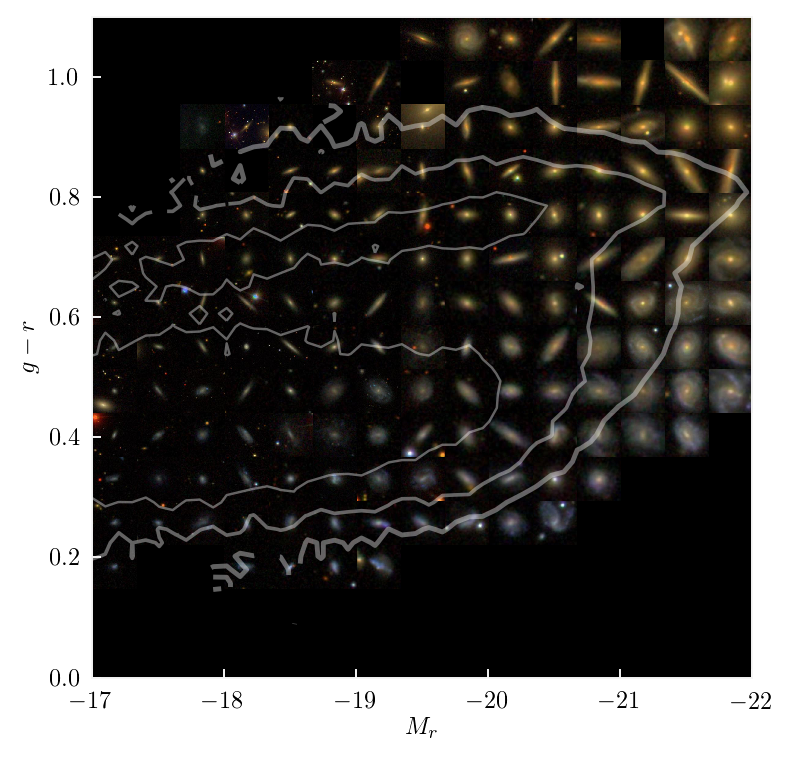

In [32]:
from code.plot_utils import plot_sdss_collage_with_2d_dist

# let's re-select a sample of nearby SDSS galaxies down to a given distance and absolute magnitude
Mlim = -17.0; Dmax = 300.
iloc = (Mcmodel < Mlim) & (d_A < Dmax)
locdata = data[iloc]; M_rl  = Mcmodel[iloc]
zl = locdata['z']
dAl = d_A[iloc]; vmaxiloc = vmaxi[iloc]
grl = locdata['modelMag_g'] - locdata['modelMag_r'] 

kcorr_g = calc_kcor('g', zl, 'g - r', grl)
kcorr_r = calc_kcor('r', zl, 'g - r', grl)
grl_kcorr = grl - kcorr_g + kcorr_r         
r50l = locdata['petroR50_r']; r90l = locdata['petroR90_r']; 
crl = r90l / r50l 
mul = locdata['petroMag_r'] - 2.5*np.log10(0.5) + 2.5*np.log10(np.pi*(r50l)**2)


crs = locdata['petroR90_r']/locdata['petroR50_r']
mrs = locdata['petroMag_r']
size = locdata['petroR50_r']
objs = locdata['objID']; ras = locdata['ra']; decs = locdata['dec']
# surface brightess = -2.5log10(f/(pi*r^2))+ const
# term - 2.5*np.log10(0.5) below is to account that we are using the *half* light radius
sbs = mrs - 2.5*np.log10(0.5) + 2.5*np.log10(np.pi*(size)**2)

xlabel = r'$M_r$'; ylabel = r'$g-r$'
nrows = 15; ncols = 15; rnd_seed = 321
ylims = [0.,1.1]; xlims = [-22.,-17.]
clevs = np.linspace(0.2,0.95,4)
clevs = [0.68, 0.95, 0.99]
print clevs
plt.rc('font',size=10)

plot_sdss_collage_with_2d_dist(objs, ras, decs, xs=M_rl, ys=grl_kcorr, weights = vmaxiloc,
                               xlims = xlims, ylims=ylims, xlab=xlabel, ylab=ylabel, 
                               show_axis=True, show_xaxis=True, show_yaxis=True,
                               nrows=nrows, ncols=ncols, npix = 150, ncont_bins = 51,
                               rnd_seed=rnd_seed, clevs = clevs, dA = dAl, facecolor='black', outfile='fig/Mrgr_collage.png')



<img width=700 align=left src='fig/Mrgr_collage.png'></img>

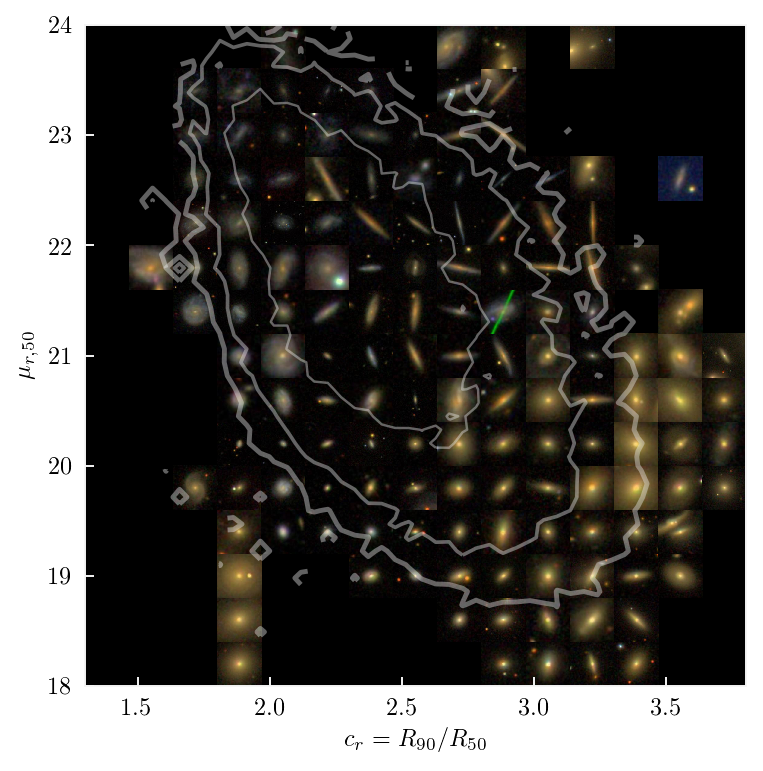

In [34]:
crlim = [1.3,3.8]; sblim = [18., 24.]
xlabel = r'$c_r=R_{90}/R_{50}$'; ylabel = r'$\mu_{r,50}$'
plot_sdss_collage_with_2d_dist(objs, ras, decs, xs=crl, ys=mul - kcorr_r, xlims = crlim, 
                               ylims=sblim, xlab=xlabel, ylab=ylabel, weights = vmaxiloc,
                               nrows=nrows, ncols=ncols, npix = 150, 
                               show_axis=True, show_xaxis=True, show_yaxis=True, facecolor='black',
                               rnd_seed=rnd_seed, clevs = clevs, ncont_bins = 51, dA = dAl, outfile='fig/crmu_collage.png' ) 

<img width=700 align=left src='fig/crmu_collage.png'></img>

We can see that color, surface brightness, absolute magnitude and concentration do not cleanly separate galaxies of different morphologies on their own. However, there are overall average trends of morphology with these galaxy properties. 

If we look at the above plots, we can see that one big reason for lack of clean separation is the fact that edge-on disks are red and so mix with red spheroidals in the g-r color and they also have high concentration and surface brightness due to projection effect. This suggests that if we add one more quantity that could differentiate edge-on disks from spheroidals we could achieve a relatively clean separation of morphological types. 

<b>Question.</b> What kind of quantity would serve this purpose?

### Homework 1 (20 points) 
The entire homework is due next Wednesday, Apr 5 (10pm). 
However, part 1 a and b is due in class on Monday, Apr 3. I will randomly select some of you in class on Monday to show and discuss your rogue gallery of the Milky Way analogues.

1. (8 points) <b>Milky Way analogues.</b> (a) Select nine (or more) images of randomly drawn galaxies nearest to the Milky Way in half-light radius, $r_{50}$, $r$-band absolute magnitude, $M_r$, and $g-r$ color (see values in the next two exercises) and output their images in a collage. You can use example above showing how to create a collage of random galaxy images, but modify it to select galaxies close to the Milky Way instead of random. The best results will be obtained if you limit the galaxy sample from which you draw to within a maximum distance of $\sim 100-200$ Mpc; you may also play with other restrictions on the sample to optimize your results. 
<br>
(b) Examine images of these objects that could ostensibly be considered as the Milky Way analogues and describe their morphology. Briefly discuss any similarities and differences that you notice between different galaxies. How close are the selected galaxies to the Milky Way morphology, which you can see in Figure 2 of the ARAA review of <a href="http://adsabs.harvard.edu/abs/2016ARA%26A..54..529B">Bland-Hawthorn and Gerhard (2016)</a> on the Milky Way properties in the context of the overall galaxy population. The images are originall from <a href="http://adsabs.harvard.edu/abs/2011ARep...55..108E">Efremov (2011).</a>  
Select your favorite collage of the Milky Way analogues that matches the Milky Way morphology best and present it as part of your solutions to this exercise along with discussion of which parameters work best for this. 
<br><br>

2. (5 points) <b>Surface brightness of the Milky Way.</b> The Milky Way half-light radius is $R_{50,\rm MW}\approx 4.4\pm 0.2\ \mathrm{kpc}$. For example, <a href="http://adsabs.harvard.edu/abs/2016ApJ...831...71L">Licquia & Newman (2016)</a> estimate the scale length of the Milky Way disk to be $R_{d,\rm MW}=2.63\pm 0.13$ kpc and that $\approx 85\%$ of the stellar mass in the exponential disk. We can thus estimate the half-mass radius as $r_{50}\approx 1.678\, R_{\rm d}$ (see S 1.3.1 in the class <a href="">notes</a>). Absolute $r$-band luminosity of the Milky Way is estimated to be $M_{r,\rm MW}-5\log_{10}h=-20.97\pm 0.38$ (see Table 7 in <a href="http://adsabs.harvard.edu/abs/2016ApJ...831...71L">Licquia & Newman (2016)</a>). Compute the $r$-band surface brightness of the Milky Way within $r_{50}$ in magnitudes per square arcsecond, as it would be seen by an extragalactic observer (and show how you did it in intermediate steps). 
<br><br>

3. (7 points). <b>Milky Way's place in the realm of galaxies.</b> (a) Use the script that produced $g-r$ vs $M_r$, $(g-r)-c_r$, $\mu_r-M_r$ for the entire galaxy sample in the notebook above as an example to make your own similar plot. Add the point with error bars for the Milky Way to these diagrams: $(g-r)$ color of the Milky Way is estimated to be $(g-r)_{\mathrm{MW}}=0.678^{+0.069}_{-0.057}$, while $M_r$ is given in the previous exercise (see Table 7 in <a href="http://adsabs.harvard.edu/abs/2016ApJ...831...71L">Licquia & Newman (2016)</a>). You have to figure out how to compute $c_r$ given the information given above.  Discuss location of the Milky Way relative to other galaxies in the diagrams. (5 points)<br> 
(b) Does appearance of galaxies in exercise 1 above change significantly, if you add the light concentration, $c_r$, as an additional constraint to select Milky Way analogues? What if you use it instead of one of the quantities used in 1: $M_r$, $g-r$, or $r_{50}$? (2 points)
<br><br>